In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re

%matplotlib inline

In [3]:
df = pd.read_csv('sample.csv')
print(df.shape)
df.head()

(31091, 1)


,original_text
0,"Ever since, the #vietnamwar, she's good a stir..."
1,Fonda arrested during climate protest: I was i...
2,#Yuge #NobelPeacePrize News\n#GretaThunberg De...
3,#GretaThunberg has been snubbed yet again!\n\n...
4,"Today may be due to the social media hype, peo..."


In [4]:
regex = re.compile(r'#[a-zA-z]+')

hashtags = []
for line in df['original_text']:
    hashtags.extend(regex.findall(line))
    
print('Total Hashtags : %d'%len(hashtags))

Total Hashtags : 54468


In [5]:
hashtag_counts = Counter(hashtags)

def get_topn(hashtags, n=10):
    sorted_hashtags = sorted(hashtags.items(), key=lambda x: x[1], reverse=True)
    return np.array(sorted_hashtags)[:n]

[['#GretaThunberg' '18112']
 ['#ClimateChange' '2252']
 ['#NobelPeacePrize' '1168']
 ['#gretathunberg' '925']
 ['#ExtinctionRebellion' '877']
 ['#ClimateStrike' '708']
 ['#FridaysForFuture' '576']
 ['#Putin' '502']
 ['#ClimateEmergency' '493']
 ['#ClimateAction' '487']]


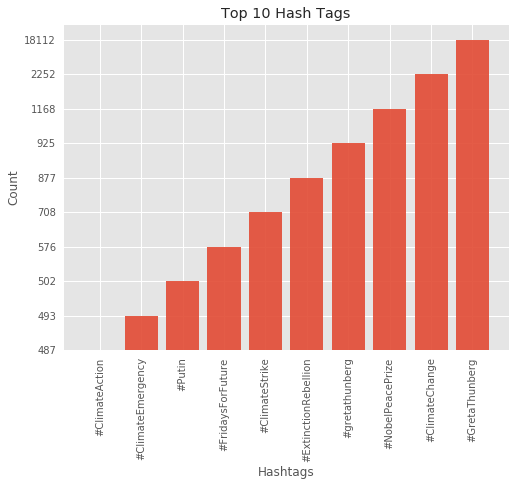

In [8]:
n = 10 ## Change it according to your need
top10 = get_topn(hashtag_counts, n)
print(top10)

with plt.style.context(('seaborn','ggplot')):
    plt.figure(figsize=(8,6))
    plt.bar(top10[:,0][::-1], top10[:,1][::-1], alpha=0.9)
    plt.xticks(rotation='vertical')
    plt.title('Top %d Hash Tags'%n)
    plt.xlabel('Hashtags')
    plt.ylabel('Count')